Data zoeken van Amerika van hoeveel automobilisten, percentage verzekerde mensen en percentage ongelukken van verzekerde mensen

National average of $1,730 per year or $144 per month for full coverage

(1) State Farm:
Coverage Type	      Cost Per Month	Cost Per Year
Full coverage	            $104	       $1,250
Minimum coverage	        $52	           $625


Updated: Aug 10, 2023:
Car Insurance Provider	Average Monthly Cost	Average Annual Cost
USAA	                      $88	                  $1,054
Erie Insurance	              $103	                  $1,238
Nationwide	                  $107	                  $1,281
Geico	                      $109	                  $1,308
Auto-Owners Insurance	      $111	                  $1,337
State Farm	                  $123	                  $1,481
American Family Insurance	  $128	                  $1,537
Progressive	                  $134	                  $1,611
Travelers	                  $139	                  $1,669
Allstate	                  $174	                  $2,088
Farmers	                      $178	                  $2,140

Data zoeken van Amerika van hoeveel automobilisten, percentage verzekerde mensen en percentage ongelukken van verzekerde mensen

- In 2023 there are a projected 243.4 million licensed drivers in the US, which includes 89% of US adults.

Updated: Aug 17 2023
The vast majority of drivers have comprehensive and collision coverage. In addition to buying liability car insurance, 79% of insured drivers buy comprehensive coverage and 75% purchase collision coverage. One in eight drivers has no car insurance (12.6%).

Collision claims are claims to an insurance company or payment of cost in repairing one's vehicle regardless of who is at fault for the damage. According to the car insurance claims database from 2018, 6.1% of all collision insurance policyholders in the US had a claim.

Inladen van modules en df:

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


df = pd.read_csv('US_Accidents_June20.csv')







Algemene explorative data

In [18]:
print(df.columns)
df.info()
df.head()

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Day', 'Is_Weekend'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 53 columns):
 #   Column                 Dtype         
---  ------                 ----

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Is_Weekend
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,Night,Night,Night,Night,2016,2,Monday,False
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,Night,Night,Night,Day,2016,2,Monday,False
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,True,False,Night,Night,Day,Day,2016,2,Monday,False
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,Night,Day,Day,Day,2016,2,Monday,False
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,True,False,Day,Day,Day,Day,2016,2,Monday,False


In [ ]:
# Bereken basisstatistieken voor numerieke kolommen
statistieken = df.describe()

# Toon de statistieken
print("Basisstatistieken voor numerieke kolommen:")
print(statistieken)

# Bereken modus voor alle kolommen
modus = df.mode()

# Toon de modus
print("\nModus voor alle kolommen:")
print(modus)

df schoonmaken 

In [7]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")
df["End_Time"] = pd.to_datetime(df["End_Time"], errors="coerce")

specifieke slechte data aantekeningen

In [4]:
#d = df[df['State'] == 'CA']['City'].unique()
#print(d[600:1100]) #non ca cities in this list
#df['Wind_Direction'].unique()
# Saint Johns (Note: This appears twice, it should likely be St. Johns) FL state
#(Note: This appears twice, it should likely be St. Lucie) FL state

#TX state does not contain all counties

In [ ]:
# Get columns with missing values and the number of missing values in each column
columns_with_missing_values = df.columns[df.isnull().any()]
missing_values_per_column = df[columns_with_missing_values].isnull().sum()

# Iterate through columns with missing values and print the information
for column in columns_with_missing_values:
    missing_count = missing_values_per_column[column]
    print(f'"{column}" heeft {missing_count} missende waardes')

Data op landelijke schaal (Bart)

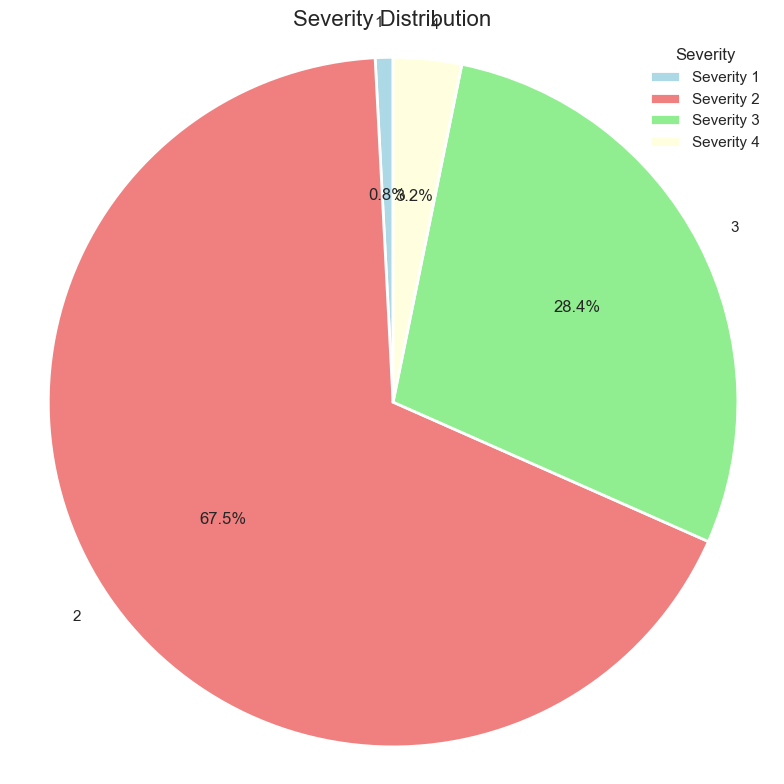

In [51]:
# Get severity counts and sort them by severity level
severity_counts = df['Severity'].value_counts().sort_index()

# Define a custom color palette
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

# Add a title
plt.title('Severity Distribution', fontsize=16)

# Add a legend
plt.legend(title='Severity', loc='upper right', labels=['Severity ' + str(s) for s in severity_counts.index])

# Ensure the pie chart is drawn as a circle
plt.axis('equal')

# Add a shadow for depth
plt.gca().set_aspect('equal')
plt.tight_layout()

# Show the chart
plt.show()


In [ ]:
# Bereken basisstatistieken voor numerieke kolommen
statistieken = df.describe()

# Toon de statistieken
print("Basisstatistieken voor numerieke kolommen:")
print(statistieken)

# Bereken modus voor alle kolommen
modus = df.mode()

# Toon de modus
print("\nModus voor alle kolommen:")
print(modus)

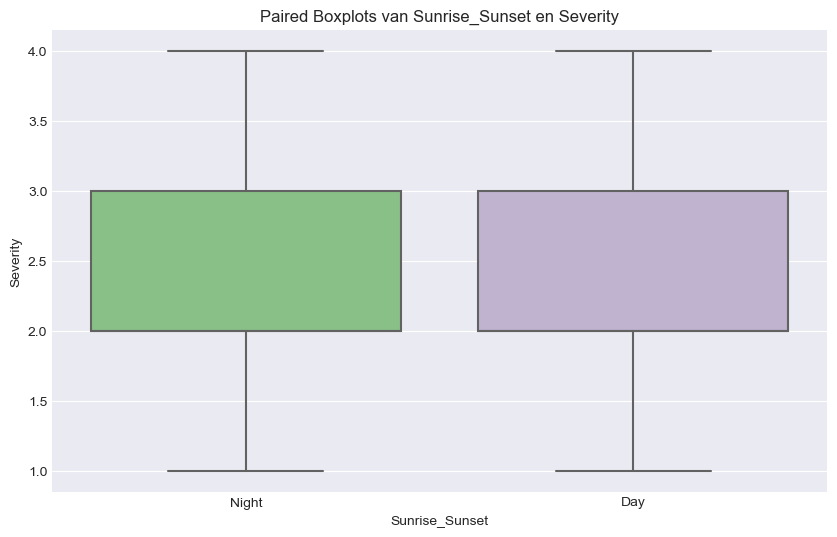

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sunrise_Sunset', y='Severity', data=df)
plt.title('Paired Boxplots van Sunrise_Sunset en Severity')
plt.xlabel('Sunrise_Sunset')
plt.ylabel('Severity')
plt.show()

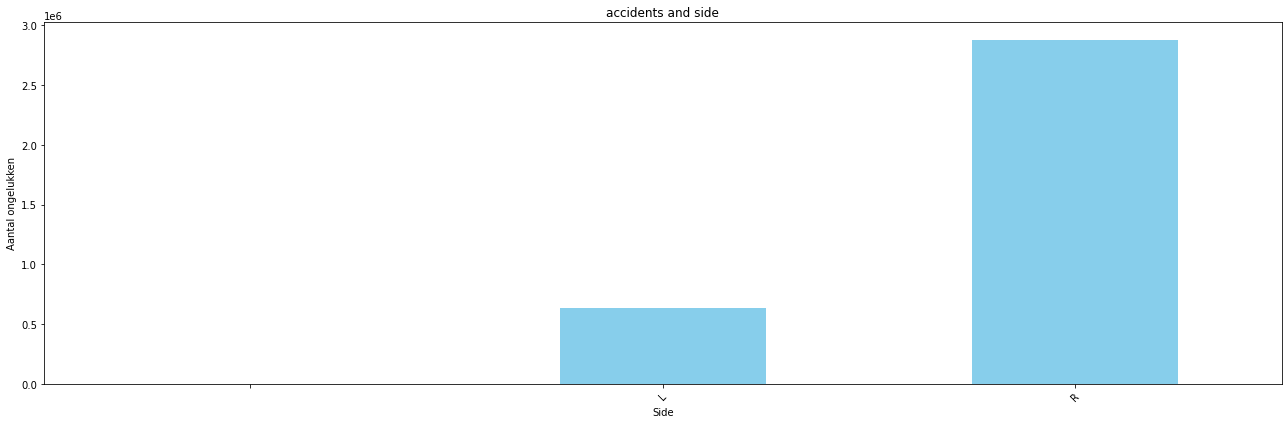

In [61]:
state_accident_counts = df['Side'].value_counts().head(60)
state_accident_counts = state_accident_counts.sort_index(ascending=True)

plt.figure(figsize=(18, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('accidents and side')
plt.xlabel('Side')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Tijd

In [27]:
df["Year"]=df["Start_Time"].dt.year
df["Month"]=df["Start_Time"].dt.month_name()
df["Day"]=df["Start_Time"].dt.day_name()
df['Hour']=df['Start_Time'].dt.hour

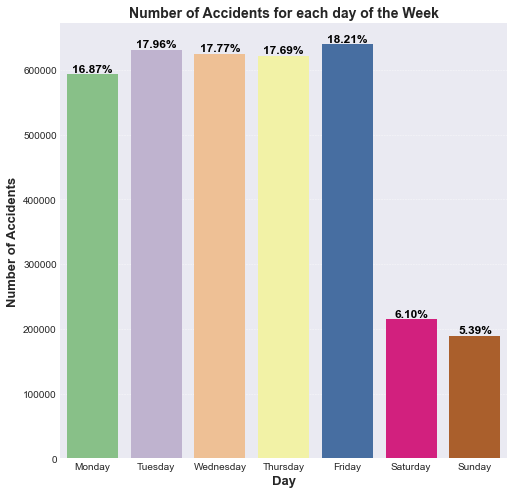

In [11]:
# Set the style
plt.style.use('seaborn-darkgrid')
custom_palette = sns.color_palette("Accent", 7)
sns.set_palette(custom_palette)

# Create a figure with a specified size
plt.figure(figsize=(8, 8))

# Add a grid with specified properties
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Define the order of days
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a countplot
sns.countplot(x=df["Day"], order=order)
total_counts = df["Day"].value_counts()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set the x and y axis labels and title
plt.xlabel("Day", fontsize=13, fontweight="bold")
plt.ylabel("Number of Accidents", fontsize=13, fontweight="bold")
plt.title("Number of Accidents for each day of the Week", fontsize=14, fontweight="bold")

ax = plt.gca()

# Add percentage labels above the bars
for i, bar in enumerate(ax.patches):
    proportion = (total_counts[order[i]] / total_counts.sum()) * 100
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position at the center of the bar
        bar.get_height() + 500,  # Y position just above the bar
        f'{proportion:.2f}%',  # Text label with two decimal places
        fontsize=12,
        ha='center',  # Horizontal alignment
        va='bottom' if proportion > 5 else 'top',  # Adjust text position based on percentage
        fontweight='bold',
        color='black' if proportion > 5 else 'white'  # Adjust text color for visibility
    )

# Display the plot
plt.show()

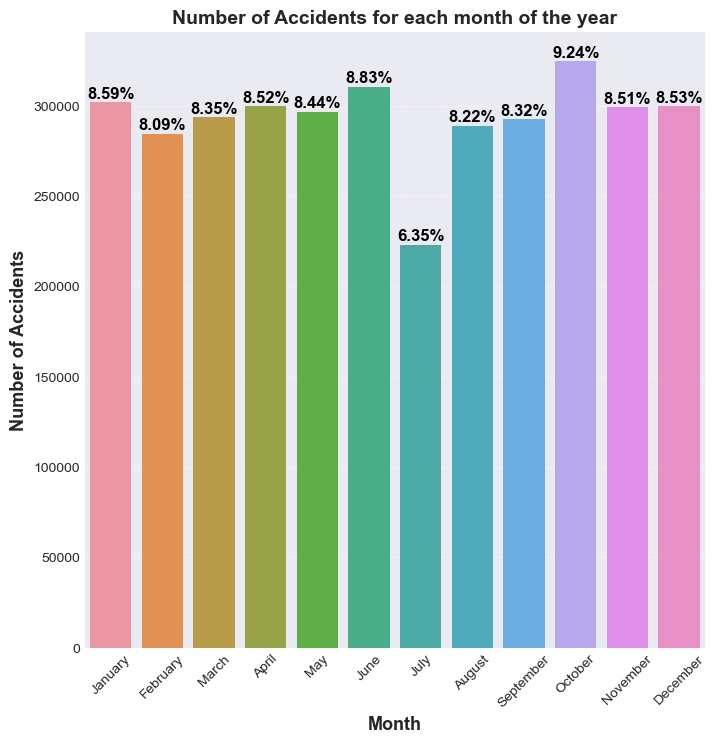

In [22]:
# Set the style
plt.style.use('seaborn-darkgrid')
custom_palette = sns.color_palette("Accent", 7)
sns.set_palette(custom_palette)

# Create a figure with a specified size
plt.figure(figsize=(8, 8))

# Add a grid with specified properties
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Define the order of days
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a countplot
sns.countplot(x=df["Month"], order=order)
total_counts = df["Month"].value_counts()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set the x and y axis labels and title
plt.xlabel("Month", fontsize=13, fontweight="bold")
plt.ylabel("Number of Accidents", fontsize=13, fontweight="bold")
plt.title("Number of Accidents for each month of the year", fontsize=14, fontweight="bold")

ax = plt.gca()

# Add percentage labels above the bars
for i, bar in enumerate(ax.patches):
    proportion = (total_counts[order[i]] / total_counts.sum()) * 100
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position at the center of the bar
        bar.get_height() + 500,  # Y position just above the bar
        f'{proportion:.2f}%',  # Text label with two decimal places
        fontsize=12,
        ha='center',  # Horizontal alignment
        va='bottom' if proportion > 5 else 'top',  # Adjust text position based on percentage
        fontweight='bold',
        color='black' if proportion > 5 else 'white'  # Adjust text color for visibility
    )

plt.xticks(rotation=45)
# Display the plot
plt.show()

In [53]:
df_wholey = df[df['Year'].isin(['2017', '2018', '2019'])]


data set is tot jun 2020

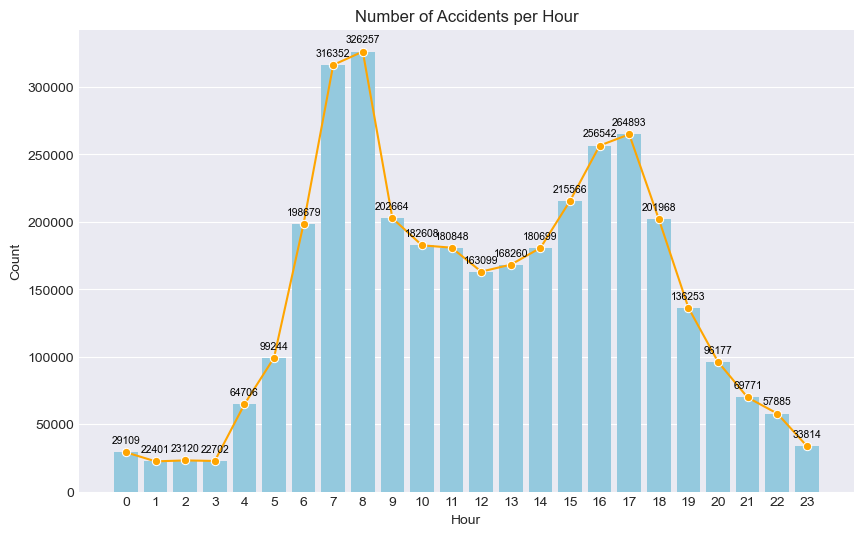

In [48]:
hour_counts = df["Hour"].value_counts().reset_index()
hour_counts.columns = ["Hour", "Count"]
plt.figure(figsize=(10, 6))

# Create a bar plot
ax = sns.barplot(data=hour_counts, x="Hour", y="Count", color="skyblue")

# Add a line plot on top of the bars
sns.lineplot(data=hour_counts, x="Hour", y="Count", marker="o", color="orange", ax=ax)

# Add labels to the bars with adjusted placement
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom' if height > 5 else 'top', fontsize=7.5,
                color='black', xytext=(0, 5 if height > 5 else -5), textcoords='offset points', rotation=0)

plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Number of Accidents per Hour")
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

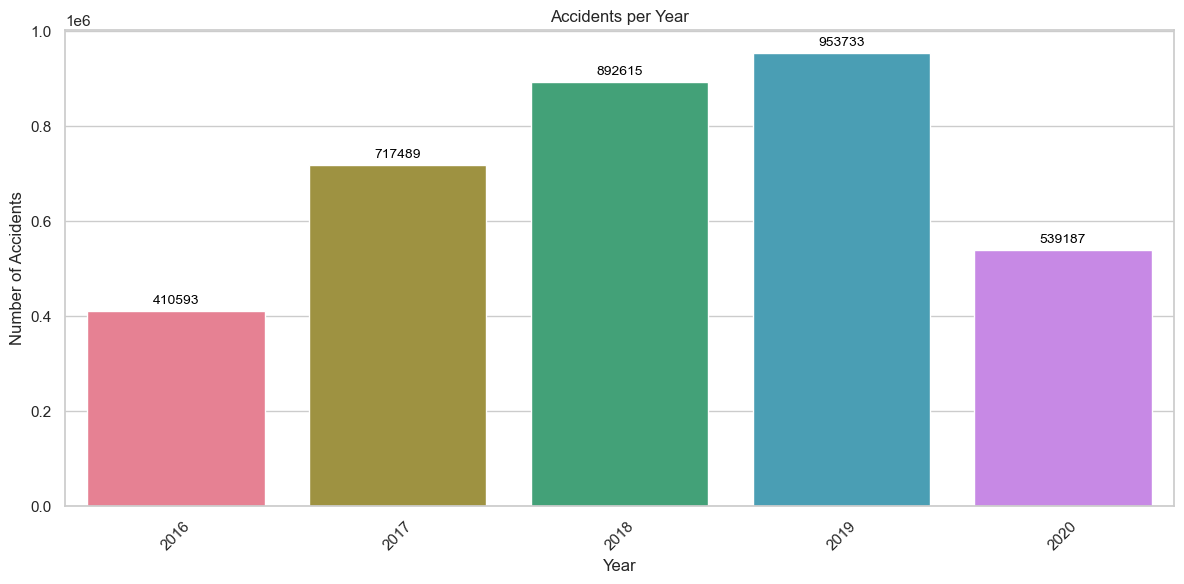

In [50]:
yearly_accident_counts = df.groupby(['Year']).size().reset_index(name='Accident Count')

# Set a custom color palette (optional)
custom_palette = sns.color_palette("husl", len(yearly_accident_counts))

# Set plot size and style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a bar plot
ax = sns.barplot(data=yearly_accident_counts, x='Year', y='Accident Count', palette=custom_palette)

# Customize the plot
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

Data op individuele staten (Quint & Doena)

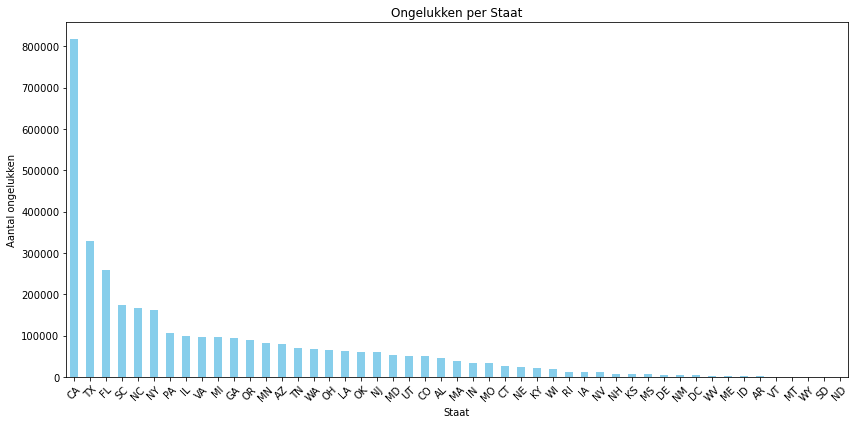

In [5]:
state_accident_counts = df['State'].value_counts()

plt.figure(figsize=(12, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('Ongelukken per Staat')
plt.xlabel('Staat')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()



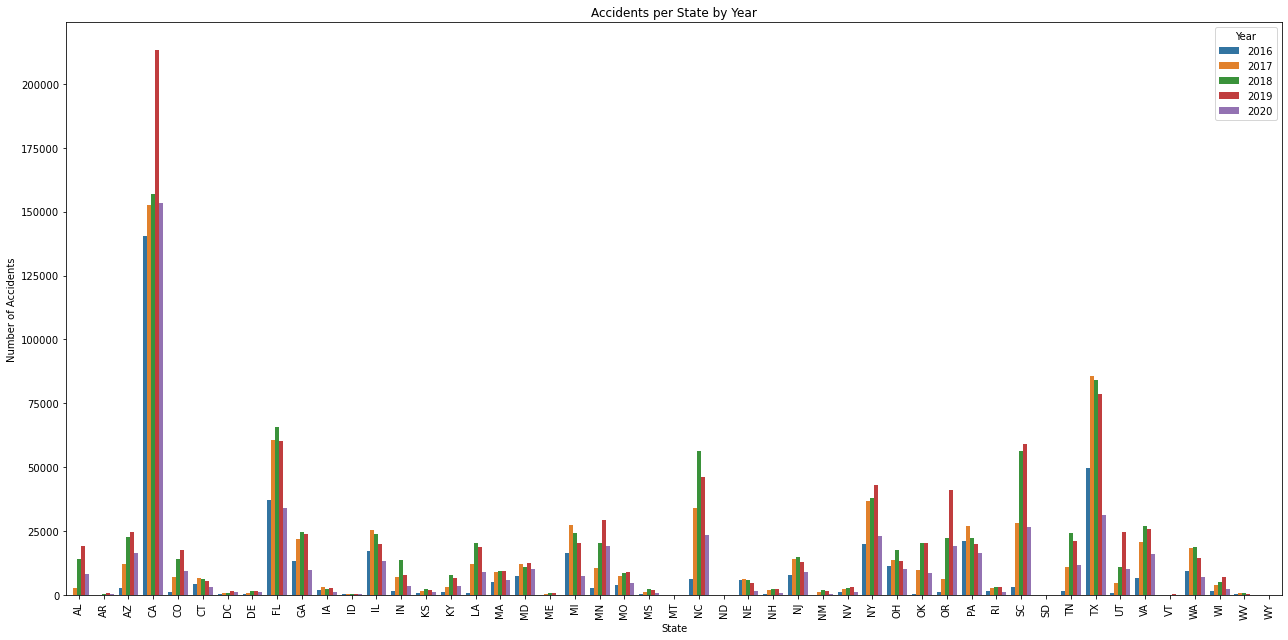

In [6]:
df['Year'] = pd.to_datetime(df['Start_Time']).dt.year

# Group by 'State', 'Year', and calculate the accident counts
state_year_accident_counts = df.groupby(['State', 'Year']).size().reset_index(name='accident_count')

plt.figure(figsize=(18, 9))

# Create a bar chart using seaborn with 'State' on the x-axis and 'Year' as hue
sns.barplot(data=state_year_accident_counts, x='State', y='accident_count', hue='Year')

plt.title('Accidents per State by Year')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.show()

Isabel:

In [ ]:
#leuk coderen

Sophia met weer enzo:

In [ ]:
#leuker coderen